<a href="https://colab.research.google.com/github/Snrbsk/btk-manisa-yapayZeka/blob/main/handwrite_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import  layers, models
import numpy as np #image'i array'e dönüştürme
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sbn


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#Normalization
x_train,x_test = x_train / 255.0, x_test /255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28,28,1))
x_test = x_test.reshape((x_test.shape[0], 28,28,1))

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8920 - loss: 0.3435 - val_accuracy: 0.9856 - val_loss: 0.0462
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0487 - val_accuracy: 0.9900 - val_loss: 0.0337
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9892 - val_loss: 0.0331
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0227 - val_accuracy: 0.9920 - val_loss: 0.0245
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9942 - loss: 0.0187 - val_accuracy: 0.9914 - val_loss: 0.0290


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


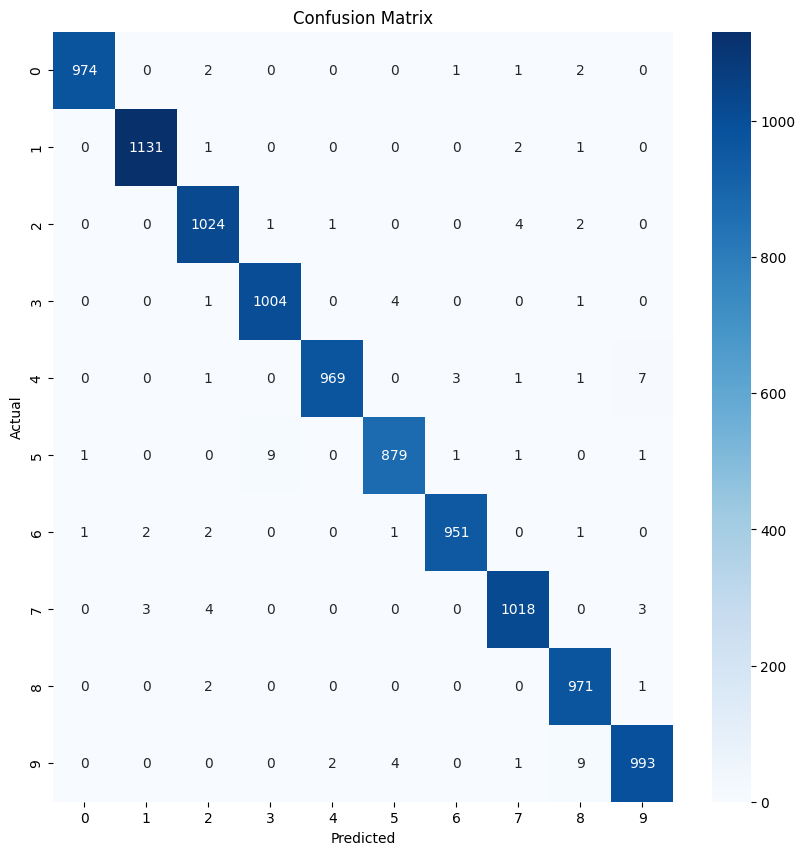

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
sbn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

In [ ]:
model.save('mnist_model.h5')

In [ ]:
#Kaydedilen Model Nasıl Çağırılır?
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import  layers, models
import numpy as np #image'i array'e dönüştürme
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sbn
import cv2


In [ ]:
model = load_model('mnist_model.h5')

In [ ]:
def load_and_prepare_image(file_path):
  #Görüntüyü yükle
  img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
  if img is None:
    raise Exception("Could not read image")

  #28*28 yap
  img = cv2.resize(img, (28,28))

  #Görüntüyü normalleştir
  img = img / 255.0

  #Modelin beklediği şekle dönüştür
  img = img.reshape((1,28,28,1))

  return img

In [ ]:
def classify_image(file_path):
  img = load_and_prepare_image(file_path)
  prediction = model.predict(img)
  predicted_class = np.argmax(prediction)

  return predicted_class


In [ ]:
file_path = "/content/7.png"
predicted_class = classify_image(file_path)
print(f"Tahmin edilen sınıf: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Tahmin edilen sınıf: 6


In [ ]:
/content/mnist_model.h5